# **Load datasets**

Path to dataset folder

In [6]:
PATH = "drive/MyDrive/Experiments/datasets/"
import numpy as np

Dataset for Centralised Learning

In [2]:
D1 = np.load(PATH+"D1.npy")

Datasets R1-R23 for Decentralised Learning

In [7]:
r1 = np.load(PATH+"R1.npy")
r2 = np.load(PATH+"R2.npy")
r3 = np.load(PATH+"R3.npy")
r4 = np.load(PATH+"R4.npy")
r5 = np.load(PATH+"R5.npy")
r6 = np.load(PATH+"R6.npy")
r7 = np.load(PATH+"R7.npy")
r8 = np.load(PATH+"R8.npy")
r9 = np.load(PATH+"R9.npy")
r10 = np.load(PATH+"R10.npy")
r11 = np.load(PATH+"R11.npy")
r12 = np.load(PATH+"R12.npy")
r13 = np.load(PATH+"R13.npy")
r14 = np.load(PATH+"R14.npy")
r15 = np.load(PATH+"R15.npy")
r16 = np.load(PATH+"R16.npy")
r17 = np.load(PATH+"R17.npy")
r18 = np.load(PATH+"R18.npy")
r19 = np.load(PATH+"R19.npy")
r20 = np.load(PATH+"R20.npy")
r21 = np.load(PATH+"R21.npy")
r22 = np.load(PATH+"R22.npy")
r23 = np.load(PATH+"R23.npy")
I = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15, r16, r17, r18, r19, r20, r21, r22, r23]


Combine into 12 Institutions

In [6]:
J = [np.concatenate((r1, r9, r13, r14)), r6, np.concatenate((r5, r21)), r23, r20, np.concatenate((r3, r10)),
      np.concatenate((r12, r19)), r17, np.concatenate((r2, r7)), r18, np.concatenate((r4, r11, r22)),
      np.concatenate((r8, r15, r16))]

Combine into 4 Institutions

In [8]:
K = [np.concatenate((r1, r3, r9, r10, r12)), np.concatenate((r2, r5, r6, r7, r13, r14, r20, r21, r23)),
      np.concatenate((r8, r15, r16, r17, r22)), np.concatenate((r4, r11, r18, r19))]

# **Data Visualisation**

Functions to map precipitation values to RGB-colors and save images.

In [9]:
def classify(value, x11 = [0.1, 0.2, 0.3, 0.5, 1, 2.5, 5, 10, 20, 30, 50, 100, 400]):
    if value >= x11[11]:
        return (255, 0, 128 - int((x11[11] - value) * (127 / (x11[12] - x11[11]))))
    elif value >= x11[10]:
        return (128 - int((x11[10] - value) * (127 / (x11[11] - x11[10]))), 0,
               0 - int((x11[10] - value) * (128 / (x11[11] - x11[10]))))
    elif value >= x11[9]:
        return (255 + int((x11[9] - value) * (127 / (x11[10] - x11[9]))), 0, 0)
    elif value >= x11[8]:
        return  (255, 128 + int((x11[8] - value) * (128 / (x11[9] - x11[8]))), 0)
    elif value >= x11[7]:
        return  (255, 255 + int((x11[7] - value) * (127 / (x11[8] - x11[7]))), 0)
    elif value >= x11[6]:
        return  (128 - int((x11[6] - value) * (128 / (x11[7] - x11[6]))), 255, 0)
    elif value >= x11[5]:
        return  (0 - int((x11[5] - value) * (128 / (x11[6] - x11[5]))), 255, 0)
    elif value >= x11[4]:
        return  (0, 128 - int((x11[4] - value) * (127 / (x11[5] - x11[4]))),
               128 + int((x11[4] - value) * (128 / (x11[5] - x11[4]))))
    elif value >= x11[3]:
        return  (
            0, - int((x11[3] - value) * (128 / (x11[4] - x11[3]))),
            255 + int((x11[3] - value) * (127 / (x11[4] - x11[3]))))
    elif value >= x11[2]:
        return  (128 + int((x11[2] - value) * (128 / (x11[3] - x11[2]))), 0,
               128 - int((x11[2] - value) * (127 / (x11[3] - x11[2]))))
    elif value >= x11[1]:
        return  (
            128, 128 + int((x11[1] - value) * (128 / (x11[2] - x11[1]))),
            255 + int((x11[1] - value) * (127 / (x11[2] - x11[1]))))
    elif value >= x11[0]:
        return  (
            0 - int((x11[0] - value) * (128 / (x11[1] - x11[0]))),
            255 + int((x11[0] - value) * (127 / (x11[1] - x11[0]))),
            255)
    else: 
        return (255, 255, 255)


def saveImg(matrix, path,x1):
    width = len(matrix) * x1
    height = len(matrix) * x1
    image = Image.new("RGB", (height, width), (255, 255, 255))
    draw = ImageDraw.Draw(image)
    for x in range(len(matrix)):
        for y in range(len(matrix)):
            for i in range(x1):
                for j in range(x1):
                    draw.point((y * x1 + i, (len(matrix) - 1 - x) * x1 + j), classify(matrix[x][y][0]))
    image.save(path + ".png")

# **Model Training**

Essential Functions

In [10]:
import os
from os import path
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, UpSampling2D, BatchNormalization, MaxPooling2D, Activation
from tensorflow.keras.models import Sequential, Model
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageFont
lr = 0.0002
batch_size = 128
optimizer = Adam(lr=lr)


def generator():
    model = Sequential()
    model.add(Dense(1024, input_shape=(100,)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation('tanh'))

    model.add(Reshape((2, 2, 256), input_shape=(1024,)))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(512, (5, 5), padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation('tanh'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(256, (5, 5), padding="same"))
    model.add(Activation('tanh'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(128, (5, 5), padding="same"))
    model.add(Activation('tanh'))

    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(1, (5, 5), padding='same'))
    model.add(Activation('tanh'))

    noise = Input((100,))
    generated = model(noise)

    return Model(noise, generated)


def discriminator():
    model = Sequential()

    model.add(Conv2D(64, (5, 5), padding='same', input_shape=(32, 32, 1)))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    data = Input((32, 32, 1))
    validity = model(data)
    return Model(data, validity)

def get_avg_weights(array_weights):
    new_weights = list()
    for weights_list_tuple in zip(*array_weights):
        new_weights.append(
            np.array([np.array(w).mean(axis=0) for w in zip(*weights_list_tuple)])
        )
    return new_weights


def fl(cycles, epochs_per_cycle, save_interval, dataset, min_acc, save_path):
    dataset=normalise_dataset(dataset)
    diss = []
    gens = []
    coms = []
    for i in range(len(dataset)):
        combined, dis, gen = build_models()
        diss += [dis, ]
        gens += [gen, ]
        coms += [combined, ]
    c_epoch = 0
    for cycle in range(cycles):
        print("Cycle "+str(cycle+1))
        for institution in tqdm(range(len(dataset))):
            for epoch in range(epochs_per_cycle):
                c_epoch = epoch_procedure(c_epoch, coms[institution], dataset[institution], diss[institution],
                                          gens[institution], min_acc, save_interval,save_path)
        diss_weight, gens_weight = fl_average(diss, gens)
        for p in range(len(dataset)):
            diss[p].set_weights(diss_weight)
            gens[p].set_weights(gens_weight)


def build_models():
    dis = discriminator()
    dis.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    gen = generator()
    dis.trainable = False
    z = Input((100,))
    img = gen(z)
    valid = dis(img)
    combined = Model(z, valid)
    combined.compile(loss='binary_crossentropy', optimizer=optimizer)
    dis.trainable = True
    return combined, dis, gen


def fl_average(diss, gens):
    diss_weights = [model.get_weights() for model in diss]
    gens_weights = [model.get_weights() for model in gens]
    diss_weight = get_avg_weights(diss_weights)
    gens_weight = get_avg_weights(gens_weights)
    return diss_weight, gens_weight


def ciil(cycles, epochs_per_cycle, save_interval, dataset, min_acc, save_path):
    combined, dis, gen = build_models()
    normalise_dataset(dataset)
    c_epoch = 0
    for cycle in range(cycles):
        print("Cycle "+str(cycle+1))
        for institution in tqdm(range(len(dataset))):
            for epoch in range(epochs_per_cycle):
                c_epoch = epoch_procedure(c_epoch, combined, dataset[institution], dis, gen, min_acc, save_interval, save_path)


def normalise_dataset(dataset):
    for i in range(len(dataset)):
        dataset[i] = (dataset[i].astype(np.float32) - 2047.5) / 2047.5
    return dataset


def epoch_procedure(c_epoch, combined, dataset, dis, gen, min_acc, save_interval, folder):
    c_epoch += 1
    d_loss = [0, 0]
    while d_loss[1] < min_acc:
        rand = np.random.randint(0, dataset.shape[0], batch_size // 2)
        trainset = dataset[rand]
        noise = np.random.normal(0, 1, (batch_size // 2, 100))
        generated = gen.predict(noise)
        d_loss_real = dis.train_on_batch(trainset, np.ones((batch_size // 2, 1)))
        d_loss_fake = dis.train_on_batch(generated, np.zeros((batch_size // 2, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_y = np.array([1] * batch_size)
    g_loss = combined.train_on_batch(noise, valid_y)
    if c_epoch % save_interval == 0:
        save(c_epoch, folder, gen)
    return c_epoch


def generate(model, n):
    return (0.5 * model.predict(np.random.normal(0, 1, (n, 100))) + 0.5) * 4095

def cl(epochs, save_interval, dataset, min_acc, save_path):
    combined, dis, gen = build_models()
    dataset=normalise_dataset([dataset, ])[0]
    for epoch in tqdm(range(epochs)):
        epoch_procedure(epoch, combined, dataset, dis, gen, min_acc, save_interval, save_path)


def save(c_epoch, save_path, gen):
    print("Saving...")
    gen.save(save_path+str(c_epoch)+".h5")
    saveImg(generate(gen,1)[0],save_path+"latestimage",4)
    img = cv2.imread(save_path+"latestimage.png", cv2.IMREAD_UNCHANGED)
    print(1)
    cv2_imshow(img)
    #print("Epoch: "+str(c_epoch)+", Score: "+str(score1)+"; Normalised: "+str(normalise_to_r1NNC(score1)))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# **Experiments**

Path to which generator models are saved.

In [4]:
SAVE_PATH=""

Experiments: Centralised Learning, varying Discriminator accuracy constraint [0.8 to 0.95]

  0%|          | 49/20000 [00:11<48:57,  6.79it/s]

Saving...
1


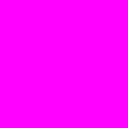

  0%|          | 99/20000 [00:20<49:57,  6.64it/s]

Saving...
1


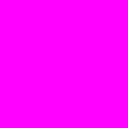

  1%|          | 149/20000 [00:27<48:29,  6.82it/s]

Saving...
1


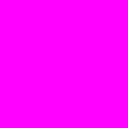

  1%|          | 199/20000 [00:35<50:45,  6.50it/s]

Saving...
1


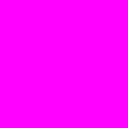

  1%|          | 249/20000 [01:07<8:50:39,  1.61s/it]

Saving...
1


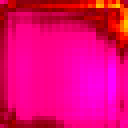

  1%|▏         | 299/20000 [01:36<2:26:03,  2.25it/s]

Saving...
1


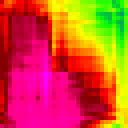

  2%|▏         | 349/20000 [01:55<2:35:11,  2.11it/s]

Saving...
1


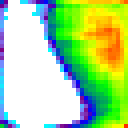

  2%|▏         | 399/20000 [02:18<3:16:11,  1.67it/s]

Saving...
1


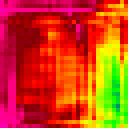

  2%|▏         | 409/20000 [02:21<1:52:58,  2.89it/s]


KeyboardInterrupt: ignored

In [10]:
folder = "cl_accuracy_0.8/"
with tf.device('/device:GPU:0'):
    cl(epochs=20000, save_interval=50, dataset=D1, min_acc=.8, save_path=SAVE_PATH+folder)

In [ ]:
folder = "cl_accuracy_0.85/"
cl(epochs=20000, save_interval=50, dataset=D1, min_acc=.85, save_path=SAVE_PATH+folder)

In [ ]:
folder = "cl_accuracy_0.9/"
cl(epochs=20000, save_interval=50, dataset=D1, min_acc=.9, save_path=SAVE_PATH+folder)

In [ ]:
folder = "cl_accuracy_0.95/"
cl(epochs=20000, save_interval=50, dataset=D1, min_acc=.95, save_path=SAVE_PATH+folder)

Experiments: Federated Learning, varying number of epochs per cycle [50 to 200]

In [ ]:
folder = "fl_I_epc50/"
fl(cycles=400,epochs_per_cycle=50,save_interval=50*23,dataset=I,min_acc=0.9,save_path=SAVE_PATH+folder)

In [ ]:
folder = "fl_I_epc100/"
fl(cycles=100,epochs_per_cycle=100,save_interval=100*23,dataset=I,min_acc=0.9,save_path=SAVE_PATH+folder)

In [ ]:
folder = "fl_I_epc200/"
fl(cycles=50,epochs_per_cycle=200,save_interval=200*23,dataset=I,min_acc=0.9,save_path=SAVE_PATH+folder)

Experiments: Federated Learning, varying institutions (combining)

In [ ]:
folder = "fl_J/"
fl(cycles=200,epochs_per_cycle=50,save_interval=50*12,dataset=J,min_acc=0.9,save_path=SAVE_PATH+folder)

0
1
2
3
Cycle 1


 75%|███████▌  | 3/4 [30:27<13:14, 794.92s/it]

Saving...
1


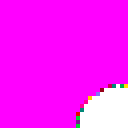

100%|██████████| 4/4 [33:27<00:00, 501.86s/it]


Cycle 2


 75%|███████▌  | 3/4 [01:41<00:32, 32.49s/it]

Saving...
1


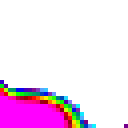

100%|██████████| 4/4 [02:12<00:00, 33.19s/it]


Cycle 3


 75%|███████▌  | 3/4 [00:30<00:10, 10.33s/it]

Saving...
1


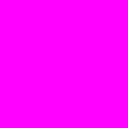

100%|██████████| 4/4 [00:40<00:00, 10.16s/it]


Cycle 4


 75%|███████▌  | 3/4 [00:25<00:08,  8.53s/it]

Saving...
1


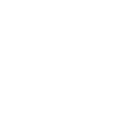

100%|██████████| 4/4 [00:33<00:00,  8.44s/it]


Cycle 5


 75%|███████▌  | 3/4 [00:24<00:08,  8.26s/it]

Saving...
1


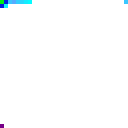

100%|██████████| 4/4 [00:32<00:00,  8.20s/it]


Cycle 6


 75%|███████▌  | 3/4 [00:27<00:09,  9.15s/it]

Saving...
1


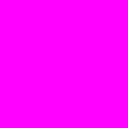

100%|██████████| 4/4 [00:39<00:00,  9.84s/it]


Cycle 7


 75%|███████▌  | 3/4 [01:14<00:24, 24.31s/it]

Saving...
1


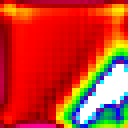

100%|██████████| 4/4 [01:37<00:00, 24.38s/it]


Cycle 8


 75%|███████▌  | 3/4 [02:53<00:57, 57.67s/it]

Saving...
1


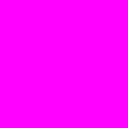

100%|██████████| 4/4 [03:37<00:00, 54.40s/it]


Cycle 9


 75%|███████▌  | 3/4 [03:37<01:13, 73.53s/it]

Saving...
1


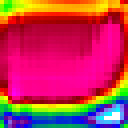

100%|██████████| 4/4 [05:01<00:00, 75.39s/it]


Cycle 10


 75%|███████▌  | 3/4 [04:42<01:33, 93.32s/it]

Saving...
1


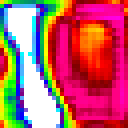

100%|██████████| 4/4 [06:14<00:00, 93.67s/it]


Cycle 11


 75%|███████▌  | 3/4 [02:05<00:42, 42.33s/it]

Saving...
1


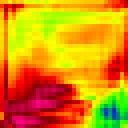

100%|██████████| 4/4 [03:03<00:00, 45.82s/it]


Cycle 12


 75%|███████▌  | 3/4 [03:02<00:59, 59.86s/it]

Saving...
1


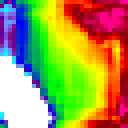

100%|██████████| 4/4 [03:52<00:00, 58.11s/it]


Cycle 13


 75%|███████▌  | 3/4 [04:33<01:28, 88.06s/it]

In [ ]:
folder = "fl_K/"
with tf.device('/device:GPU:0'):
    fl(cycles=200,epochs_per_cycle=50,save_interval=50*4,dataset=K,min_acc=0.9,save_path=SAVE_PATH+folder)

Experiments: Cyclic Institutional Incremental Learning, varying number of epochs per cycle [50 to 200]

In [ ]:
folder = "ciil_I_epc50/"
ciil(cycles=400, epochs_per_cycle=50, save_interval=50*23, dataset=I, min_acc=0.9, save_path=SAVE_PATH+folder)

In [ ]:
folder = "ciil_I_epc100/"
ciil(cycles=100, epochs_per_cycle=100, save_interval=100*23, dataset=I, min_acc=0.9, save_path=SAVE_PATH+folder)

In [ ]:
folder = "ciil_I_epc200/"
ciil(cycles=50, epochs_per_cycle=200, save_interval=200*23, dataset=I, min_acc=0.9, save_path=SAVE_PATH+folder)

Experiments: Cyclic Institutional Incremental Learning, varying institutions (combining)

In [ ]:
folder = "ciil_J/"
ciil(cycles=200, epochs_per_cycle=50, save_interval=50*12, dataset=J, min_acc=0.9, save_path=SAVE_PATH+folder)

In [ ]:
folder = "ciil_K/"
ciil(cycles=200, epochs_per_cycle=50, save_interval=50*4, dataset=k, min_acc=0.9, save_path=SAVE_PATH+folder)

# **Evaluation**

Essential functions for NNC scoring.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


def compute_1NNCScore(model, dataset, n):
    avg = 0
    size = 500
    sample = generate(model, size * n)
    for j in range(n):
        rand = np.random.randint(0, dataset.shape[0], size)
        d1 = dataset[rand]
        avg += nn(sample[[j * size + k for k in range(size)]], d1)
    return avg / n


def nn(synthetic, dataset):
    X = np.zeros((len(synthetic) + len(dataset), 32 * 32))
    y = np.ones((len(synthetic) + len(dataset),))
    for i in range(len(synthetic)):
        X[i] = synthetic[i].flatten()
        X[i + len(synthetic)] = dataset[i].flatten()
        y[i] = 0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    return acc


def normalise_to_r1NNC(y):
    return -abs(2*y-1)+1

Compute score for any given generator model.

In [17]:
model_ref = SAVE_PATH+"cl_accuracy_0.8/"+"350.h5"
with tf.device('/device:GPU:0'):
    model = tf.keras.models.load_model(model_ref)
    r1NNC = normalise_to_r1NNC(compute_1NNCScore(model=model,dataset=D1,n=int(len(D1)*0.003)))
print(r1NNC)

0.24810191082802846
